In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads = leads.replace('Select', np.nan)

In [6]:
(leads.isnull().sum()/leads.shape[0])*100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
#removing columns with more than 40% null value
leads=leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [8]:
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

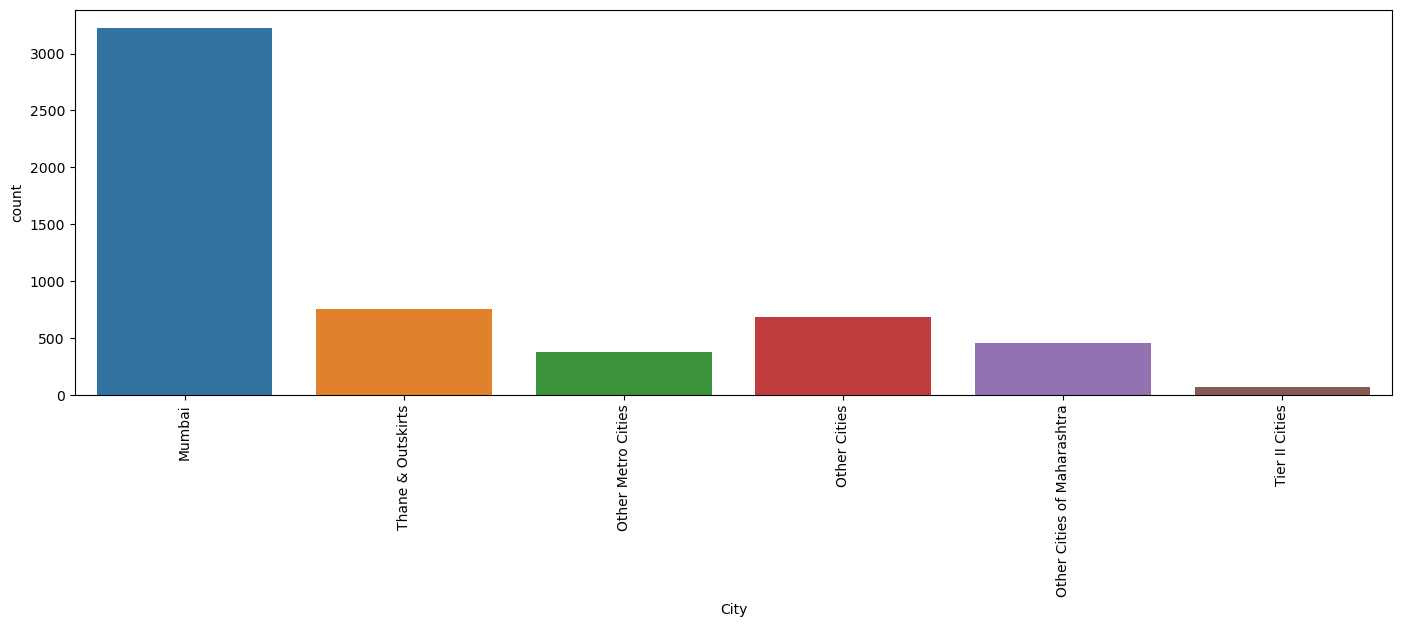

In [9]:
plt.figure(figsize=(17,5))
sns.countplot(leads['City'])
plt.xticks(rotation=90)

In [10]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [11]:
leads['City'].mode()

0    Mumbai
Name: City, dtype: object

In [12]:
#replacing missing values with mode
leads['City']=leads['City'].replace(np.nan,'Mumbai')

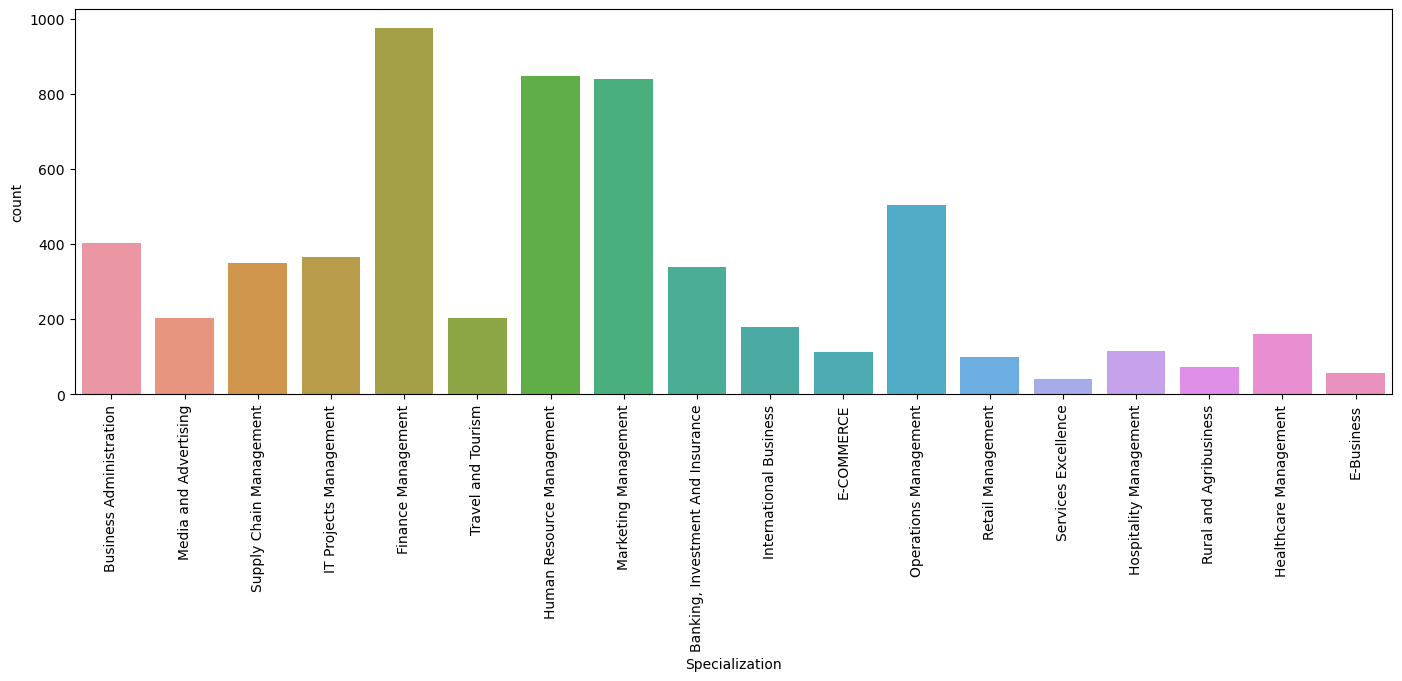

In [13]:
plt.figure(figsize=(17,5))
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [14]:
leads['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [15]:
#categorizing null values into new category Others
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

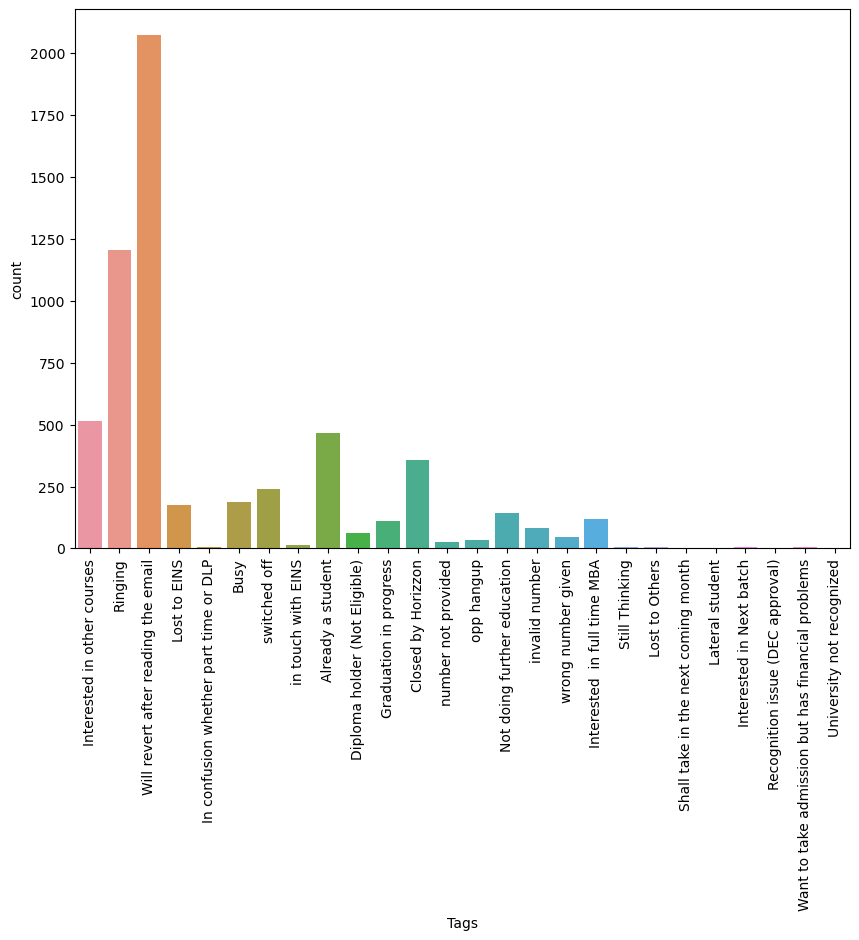

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(leads['Tags'])
plt.xticks(rotation=90)
plt.show()

In [17]:
leads['Tags'].mode()

0    Will revert after reading the email
Name: Tags, dtype: object

In [18]:
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

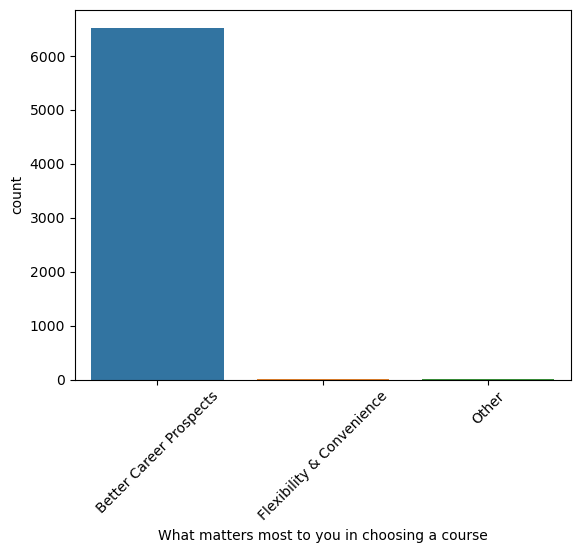

In [19]:
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [20]:
#Data is highly imbalanced, hence dropping the column.
leads=leads.drop('What matters most to you in choosing a course',axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

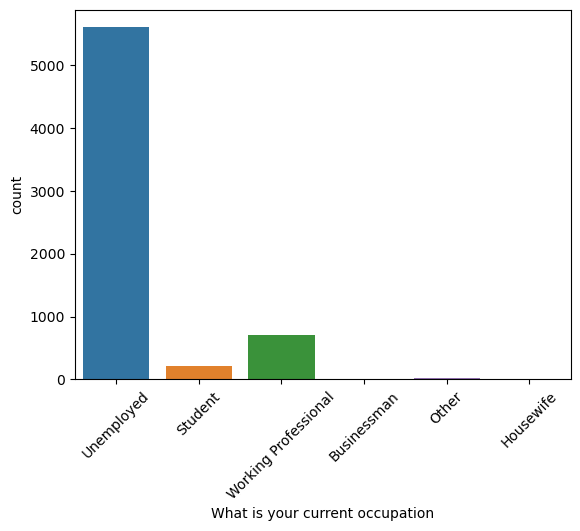

In [21]:
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=45)
plt.show

In [22]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [23]:
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

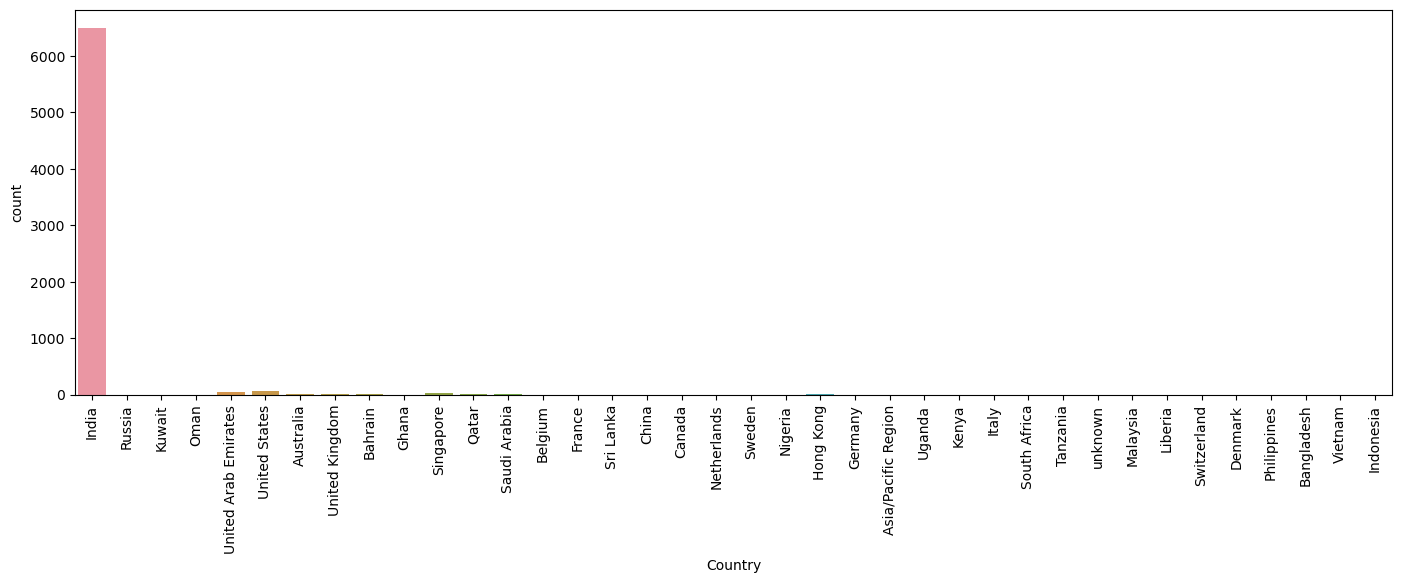

In [24]:
plt.figure(figsize=(17,5))
sns.countplot(leads['Country'])
plt.xticks(rotation=90)
plt.show()

In [25]:
leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [26]:
#replacing null values with India
leads['Country']=leads['Country'].replace(np.nan,'India')

In [27]:
#Checking null values
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [28]:
#Dropping null value rows from the columns having less than 5% null values
leads.dropna(inplace = True)

In [29]:
#Checking null values
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [30]:
#Checking for duplicate records
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [31]:
Converted_perc = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted_perc

37.85541106458012

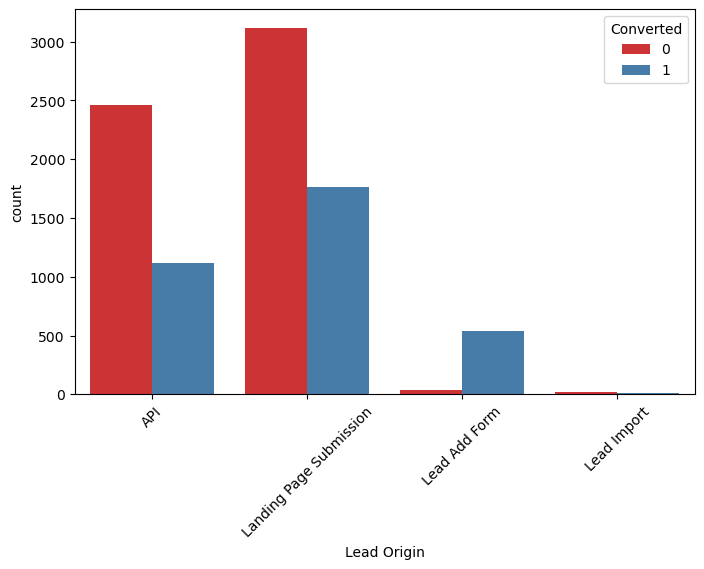

In [32]:
#lead origin and conversion check
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

1. API and Landing Page Submission have the most conversion rate but count of lead originated from them are less as compared to Lead Add Form. 
3. Lead Import are very less in count and conversion rate is also lower.

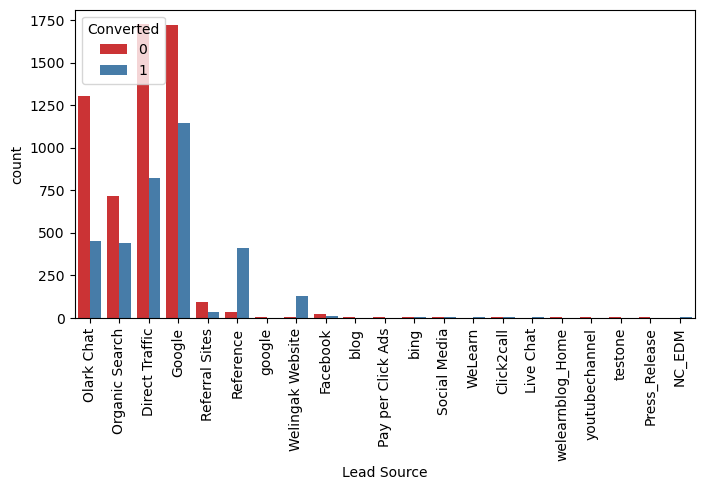

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [34]:
# Replacing 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

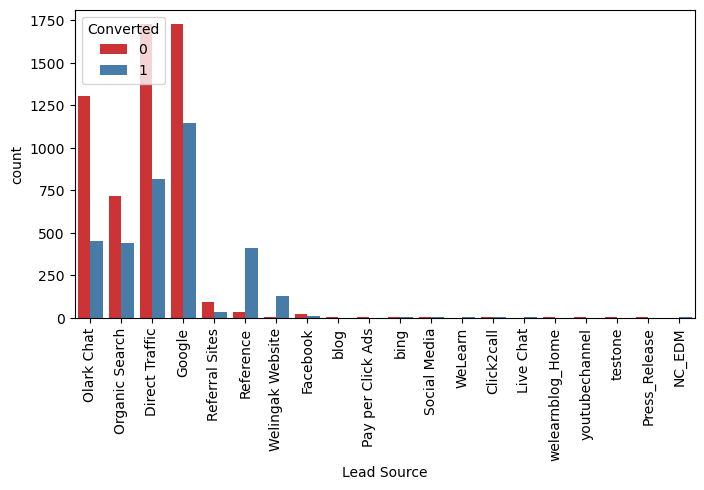

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

1. Google and Direct traffic has the max number of leads followed by olark chat.
2. Reference and  welingak website count of leads are high.

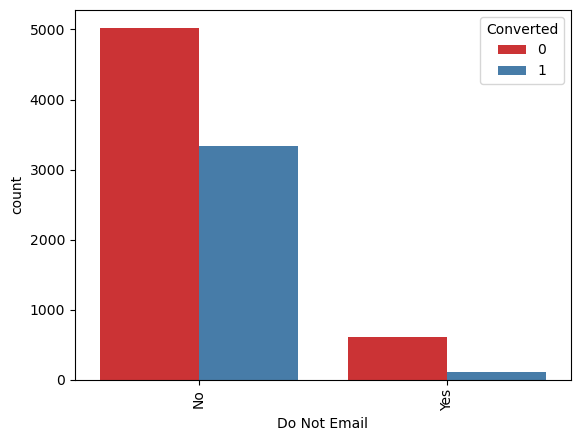

In [36]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [37]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

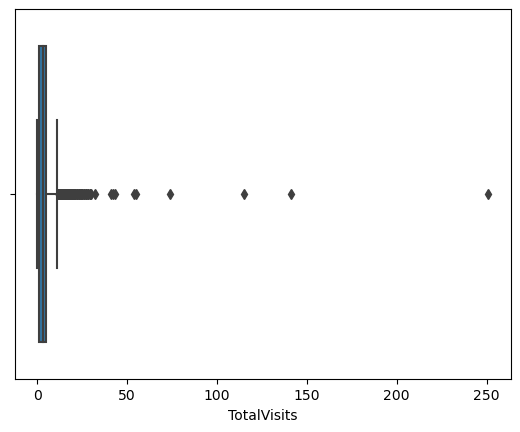

In [38]:
sns.boxplot(leads['TotalVisits'])           

In [39]:
#Capping at 99th percentile
leads=leads[leads['TotalVisits']<=10]

<AxesSubplot:xlabel='TotalVisits'>

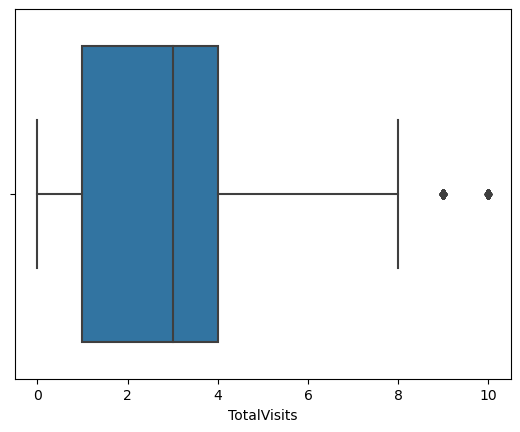

In [40]:
sns.boxplot(leads['TotalVisits'])    

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

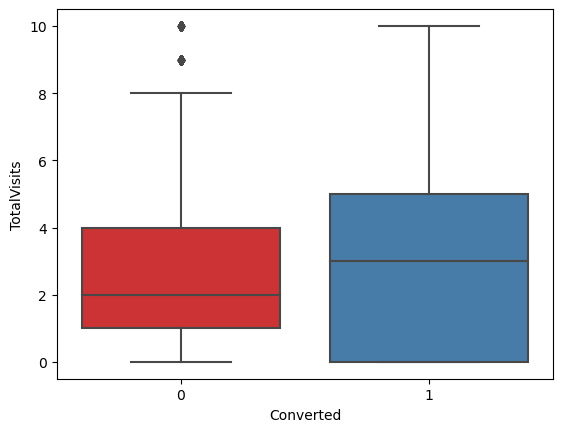

In [41]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')

#median of converted is higher than non converted.

In [42]:
leads['Total Time Spent on Website'].describe()

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
25%         2.000000
50%       236.000000
75%       899.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

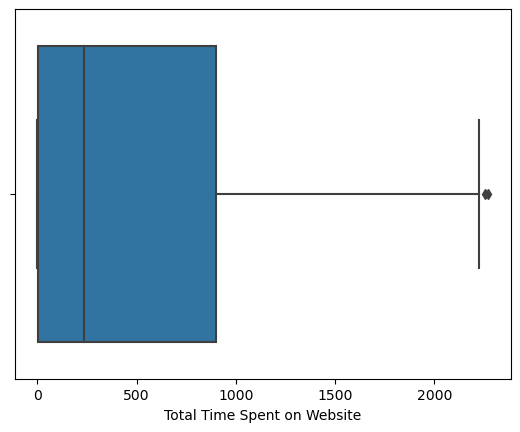

In [43]:
sns.boxplot(leads['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

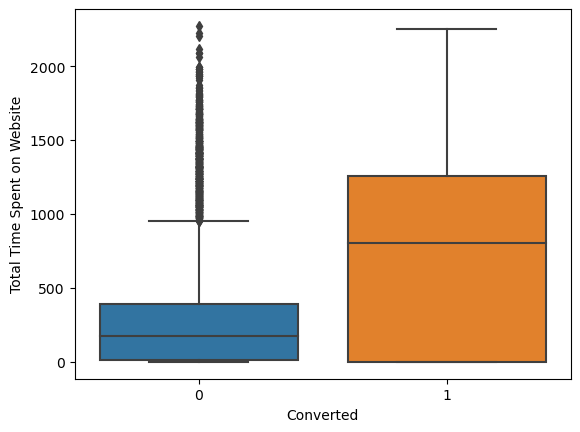

In [44]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

#people who have on an spent more time on the website tend to have a higher conversion.

In [45]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

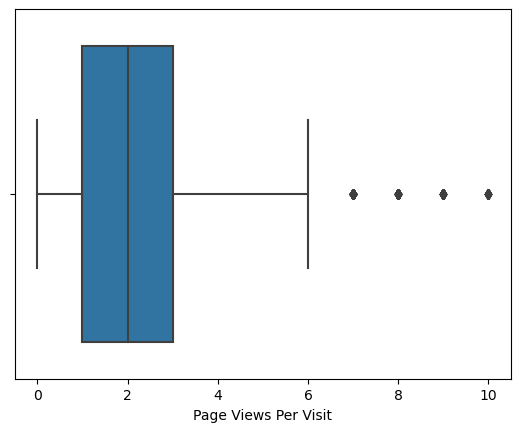

In [46]:
sns.boxplot(leads['Page Views Per Visit'])

In [47]:
#Capping at 99th percentile
leads=leads[leads['Page Views Per Visit']<=6]

<AxesSubplot:xlabel='Page Views Per Visit'>

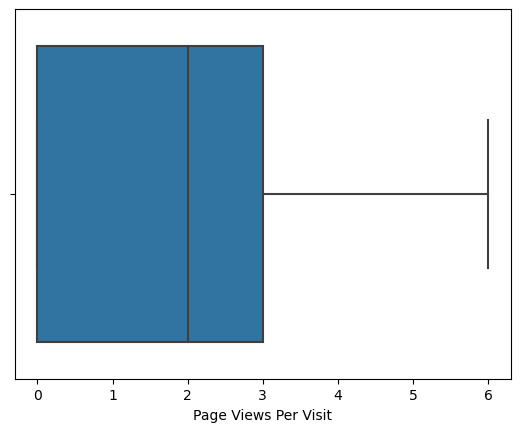

In [48]:
sns.boxplot(leads['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

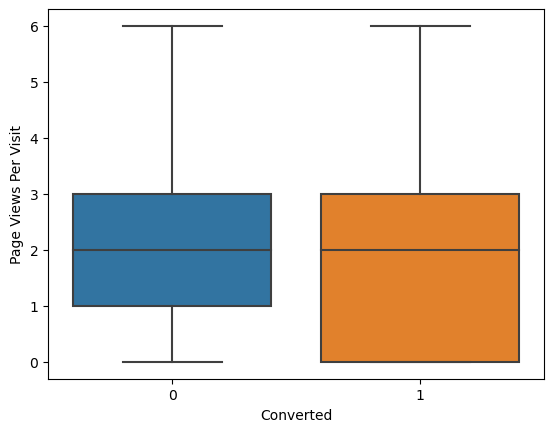

In [49]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads)

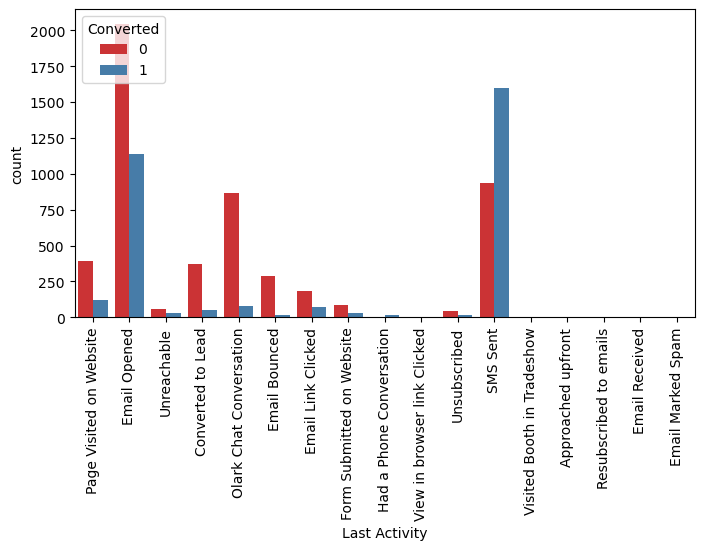

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [51]:
# merging the last activities to "Othets" which are having less data.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

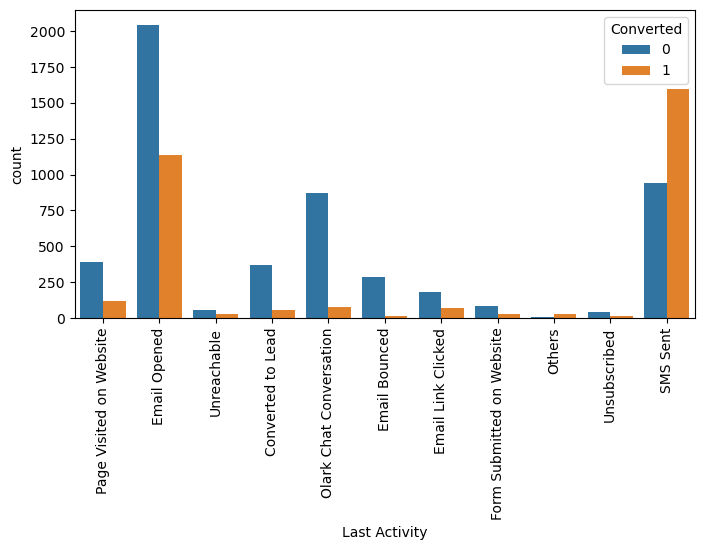

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

1.last activity as email opened is the highest, howeer conversion rate is higher of the last activity sms sent.

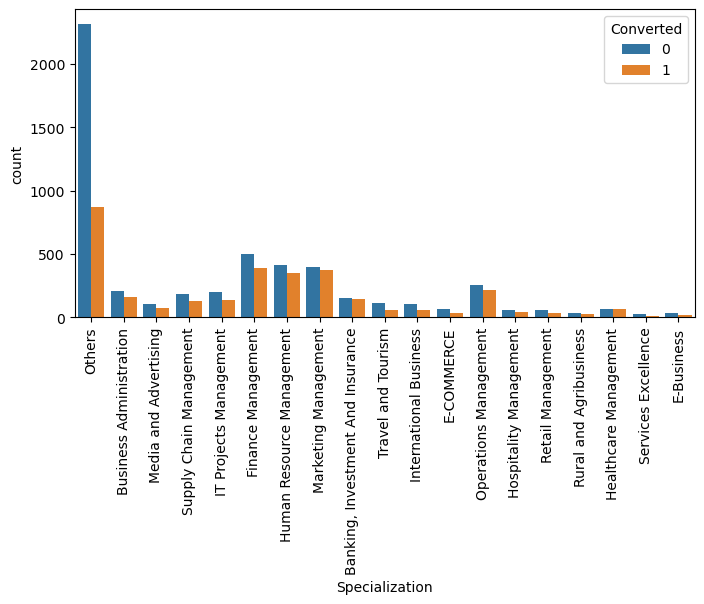

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

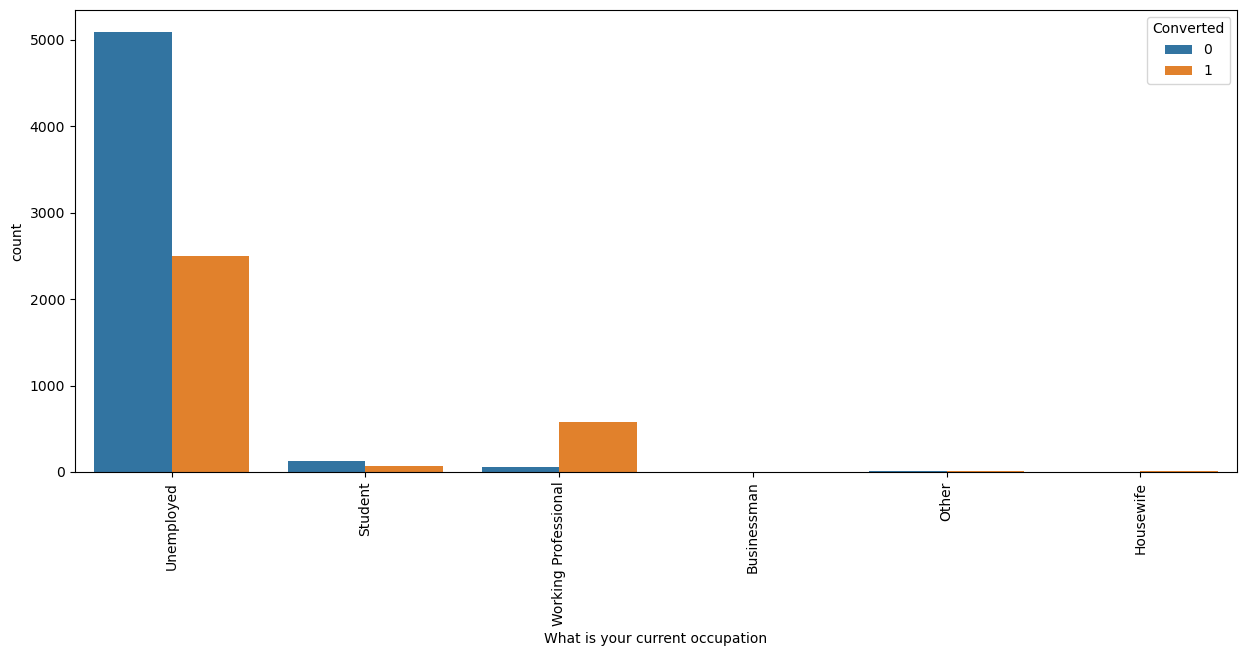

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Highest count of leads are unemployed, however conversion rate is higher in working professional.

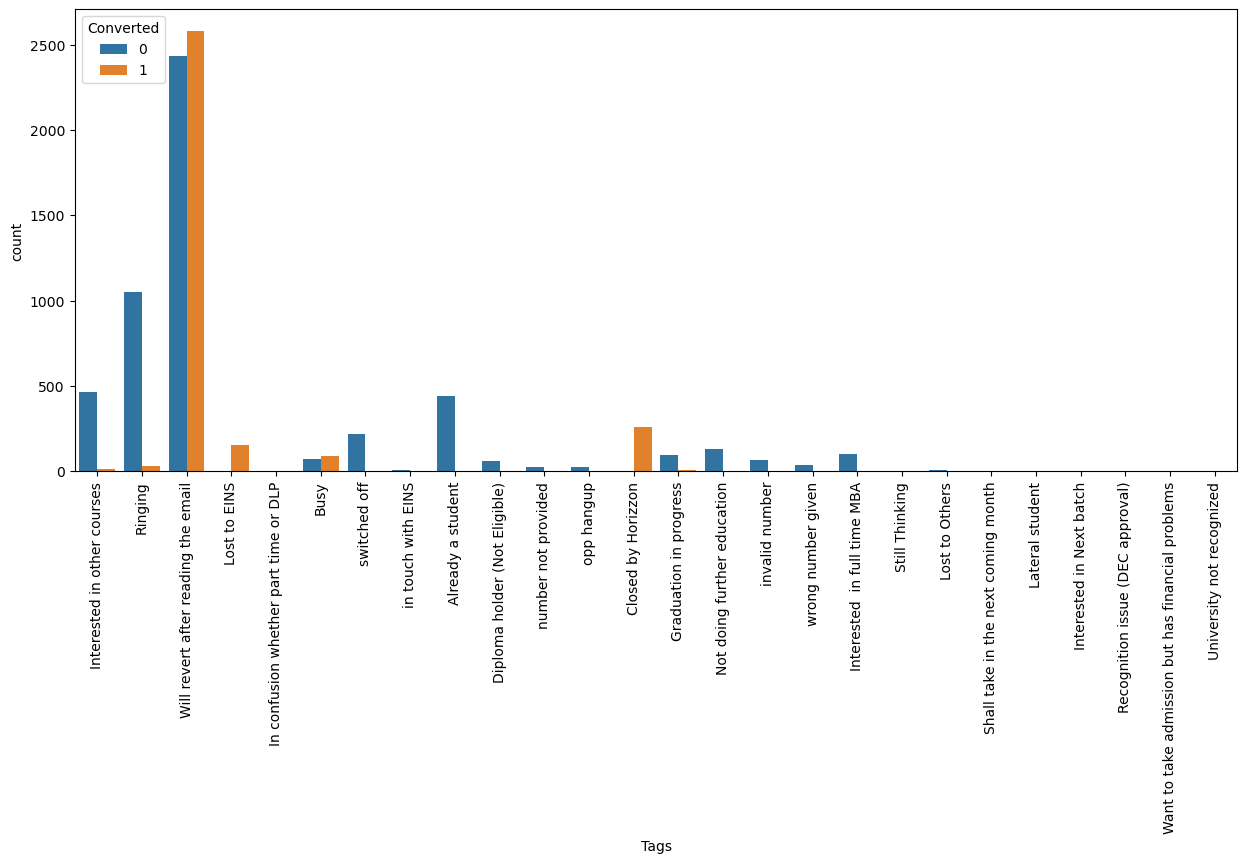

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

since these are the tags that are assigned,so this column is not useful for model building.


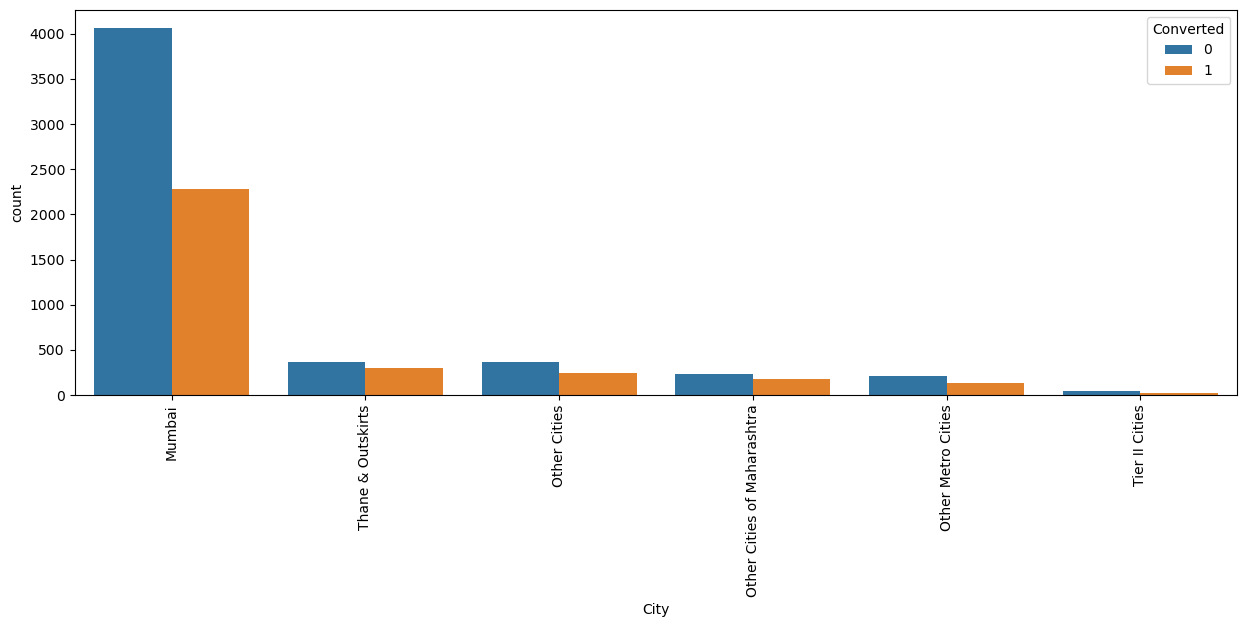

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Most of the leads are generated from mumbai.

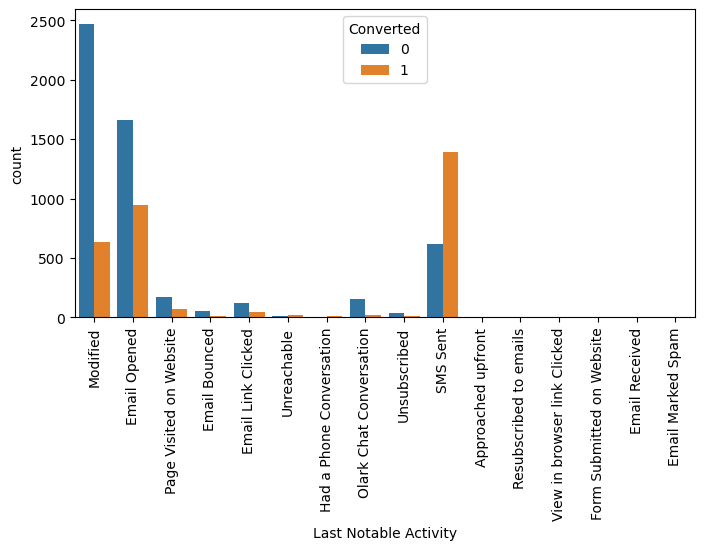

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Highest number of leads are generated had the last notatble activity as modified and highest leads were converted had the last notable activity as sms sent.

In [58]:
#dropping the columns not useful for model building
leads = leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8445 non-null   object 
 1   Lead Origin                      8445 non-null   object 
 2   Lead Source                      8445 non-null   object 
 3   Do Not Email                     8445 non-null   object 
 4   Do Not Call                      8445 non-null   object 
 5   Converted                        8445 non-null   int64  
 6   TotalVisits                      8445 non-null   float64
 7   Total Time Spent on Website      8445 non-null   int64  
 8   Page Views Per Visit             8445 non-null   float64
 9   Last Activity                    8445 non-null   object 
 10  Specialization                   8445 non-null   object 
 11  What is your current occupation  8445 non-null   object 
 12  City                

In [60]:
a =  ['Do Not Email', 'Do Not Call']

def ch(x):
    return x.map({'Yes': 1, "No": 0})

leads[a] = leads[a].apply(ch)

In [61]:
dummy= pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [63]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [64]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Splitting the data into train and test set.

In [65]:
from sklearn.model_selection import train_test_split

X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,1,0,-0.314975,-0.504462,-0.037025,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3099,0,0,-0.314975,-0.480383,-0.037025,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
91,0,0,1.396648,1.279233,-0.340229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,-1.170787,-0.865647,-1.249840,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,-0.314975,-0.617448,-0.037025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y_train

5279    0
3099    0
91      1
1577    1
487     0
       ..
403     0
90      0
8805    1
7595    1
6190    0
Name: Converted, Length: 5911, dtype: int64

Feature Selection Using RFE

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_          

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 42),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 15),
 ('Lead Source_testone', False, 34),
 ('Lead Source_welearnblog_Hom

In [73]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Model Building

In [74]:
import statsmodels.api as sm


In [75]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.9
Date:                Mon, 27 Nov 2023   Deviance:                       4855.9
Time:                        22:34:40   Pearson chi2:                 5.81e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0244      0.163     -0.149      0.881      -0.345       0.296
Do Not Email                                            -1.3046      0.204     -6.385      0.000      -1.705      -0.904
Total Time Spent on Website                              1.0483      0.042     25.103      0.000       0.966       1.130
Lead Origin_Landing Page Submission                     -1.0201      0.141     -7.243      0.000      -1.296      -0.744
Lead Origin_Lead Add Form                                2.1381      0.235      9.113      0.000       1.678       2.598
Lead Source_Direct Traffic                              -1.2511      0.153     -8.202      0.000      -1.550      -0.952
Lead Source_Google                                      -0.9698      0.129     -7.540      0.000      -1.222      -0.718
Lead Source_Organic Search                              -1.0610      0.155     -6.853      0.000      -1.364      -0.758
Lead Source_Referral Sites                              -0.9598      0.359     -2.672      0.008      -1.664      -0.256
Lead Source_Welingak Website                             3.1046      1.038      2.990      0.003       1.070       5.140
Last Activity_Email Opened                               0.8190      0.112      7.300      0.000       0.599       1.039
Last Activity_Olark Chat Conversation                   -0.8356      0.197     -4.237      0.000      -1.222      -0.449
Last Activity_Others                                     2.6796      0.663      4.044      0.000       1.381       3.979
Last Activity_SMS Sent                                   0.9264      0.166      5.587      0.000       0.601       1.251
Last Activity_Unsubscribed                               1.8030      0.469      3.848      0.000       0.885       2.721
Specialization_Others                                   -1.1405      0.128     -8.917      0.000      -1.391      -0.890
What is your current occupation_Housewife               23.0569   1.45e+04      0.002      0.999   -2.85e+04    2.85e+04
What is your current occupation_Working Professional     2.4391      0.191     12.753      0.000       2.064       2.814
Last Notable Activity_Email Bounced                      1.6153      0.499      3.235      0.001       0.637       2.594
Last Notable Activity_SMS Sent                           1.3184      0.151      8.720      0.000       1.022       1.615
Last Notable Activity_Unreachable                        2.4759      0.549      4.506      0.000       1.399       3.553
========================================================================================================================
"""

In [76]:
# Dropping the column 'What is your current occupation_Housewife'
a = cols.drop('What is your current occupation_Housewife')

In [77]:
X_train_sm = sm.add_constant(X_train[a])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2434.9
Date:                Mon, 27 Nov 2023   Deviance:                       4869.8
Time:                        22:34:40   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0167      0.163     -0.103      0.918      -0.336       0.303
Do Not Email                                            -1.3087      0.204     -6.410      0.000      -1.709      -0.909
Total Time Spent on Website                              1.0472      0.042     25.118      0.000       0.965       1.129
Lead Origin_Landing Page Submission                     -1.0130      0.141     -7.205      0.000      -1.289      -0.737
Lead Origin_Lead Add Form                                2.1523      0.234      9.181      0.000       1.693       2.612
Lead Source_Direct Traffic                              -1.2566      0.152     -8.245      0.000      -1.555      -0.958
Lead Source_Google                                      -0.9688      0.129     -7.536      0.000      -1.221      -0.717
Lead Source_Organic Search                              -1.0528      0.154     -6.814      0.000      -1.356      -0.750
Lead Source_Referral Sites                              -0.9626      0.359     -2.679      0.007      -1.667      -0.258
Lead Source_Welingak Website                             3.0926      1.038      2.979      0.003       1.058       5.128
Last Activity_Email Opened                               0.8177      0.112      7.314      0.000       0.599       1.037
Last Activity_Olark Chat Conversation                   -0.8399      0.197     -4.262      0.000      -1.226      -0.454
Last Activity_Others                                     2.6692      0.662      4.029      0.000       1.371       3.968
Last Activity_SMS Sent                                   0.9166      0.166      5.536      0.000       0.592       1.241
Last Activity_Unsubscribed                               1.7965      0.468      3.835      0.000       0.878       2.715
Specialization_Others                                   -1.1455      0.128     -8.966      0.000      -1.396      -0.895
What is your current occupation_Working Professional     2.4302      0.191     12.711      0.000       2.056       2.805
Last Notable Activity_Email Bounced                      1.6110      0.499      3.226      0.001       0.632       2.590
Last Notable Activity_SMS Sent                           1.3183      0.151      8.719      0.000       1.022       1.615
Last Notable Activity_Unreachable                        2.4660      0.549      4.488      0.000       1.389       3.543
========================================================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train[a].columns
vif['VIF'] = [variance_inflation_factor(X_train[a].values, i) for i in range(X_train[a].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,6.55
12,Last Activity_SMS Sent,5.83
17,Last Notable Activity_SMS Sent,4.68
4,Lead Source_Direct Traffic,4.27
5,Lead Source_Google,3.28
14,Specialization_Others,2.95
9,Last Activity_Email Opened,2.39
6,Lead Source_Organic Search,1.72
3,Lead Origin_Lead Add Form,1.62
10,Last Activity_Olark Chat Conversation,1.59


In [79]:
a = a.drop('Lead Origin_Landing Page Submission')

In [80]:
X_train_sm = sm.add_constant(X_train[a])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2461.5
Date:                Mon, 27 Nov 2023   Deviance:                       4923.0
Time:                        22:34:41   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5091      0.147     -3.472      0.001      -0.797      -0.222
Do Not Email                                            -1.3462      0.202     -6.675      0.000      -1.741      -0.951
Total Time Spent on Website                              1.0660      0.042     25.665      0.000       0.985       1.147
Lead Origin_Lead Add Form                                2.4062      0.230     10.451      0.000       1.955       2.858
Lead Source_Direct Traffic                              -1.7679      0.137    -12.933      0.000      -2.036      -1.500
Lead Source_Google                                      -1.2808      0.122    -10.517      0.000      -1.519      -1.042
Lead Source_Organic Search                              -1.3473      0.149     -9.028      0.000      -1.640      -1.055
Lead Source_Referral Sites                              -1.0912      0.363     -3.009      0.003      -1.802      -0.380
Lead Source_Welingak Website                             2.7781      1.036      2.680      0.007       0.747       4.810
Last Activity_Email Opened                               0.8100      0.111      7.296      0.000       0.592       1.028
Last Activity_Olark Chat Conversation                   -0.8266      0.195     -4.238      0.000      -1.209      -0.444
Last Activity_Others                                     2.6864      0.660      4.070      0.000       1.393       3.980
Last Activity_SMS Sent                                   0.9004      0.164      5.496      0.000       0.579       1.222
Last Activity_Unsubscribed                               1.7926      0.470      3.810      0.000       0.871       2.715
Specialization_Others                                   -0.5277      0.093     -5.654      0.000      -0.711      -0.345
What is your current occupation_Working Professional     2.4669      0.188     13.137      0.000       2.099       2.835
Last Notable Activity_Email Bounced                      1.5383      0.498      3.087      0.002       0.562       2.515
Last Notable Activity_SMS Sent                           1.3061      0.150      8.720      0.000       1.013       1.600
Last Notable Activity_Unreachable                        2.5550      0.547      4.669      0.000       1.482       3.628
========================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[a].columns
vif['VIF'] = [variance_inflation_factor(X_train[a].values, i) for i in range(X_train[a].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,5.68
16,Last Notable Activity_SMS Sent,4.68
8,Last Activity_Email Opened,2.20
13,Specialization_Others,2.03
4,Lead Source_Google,1.90
3,Lead Source_Direct Traffic,1.82
2,Lead Origin_Lead Add Form,1.61
9,Last Activity_Olark Chat Conversation,1.50
0,Do Not Email,1.37
1,Total Time Spent on Website,1.30


In [82]:
a = a.drop('Last Activity_SMS Sent')

In [83]:
X_train_sm = sm.add_constant(X_train[a])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.3
Date:                Mon, 27 Nov 2023   Deviance:                       4952.6
Time:                        22:34:42   Pearson chi2:                 5.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2262      0.135     -1.672      0.094      -0.491       0.039
Do Not Email                                            -1.3897      0.200     -6.955      0.000      -1.781      -0.998
Total Time Spent on Website                              1.0644      0.041     25.754      0.000       0.983       1.145
Lead Origin_Lead Add Form                                2.4516      0.231     10.622      0.000       1.999       2.904
Lead Source_Direct Traffic                              -1.7702      0.136    -12.991      0.000      -2.037      -1.503
Lead Source_Google                                      -1.2838      0.122    -10.563      0.000      -1.522      -1.046
Lead Source_Organic Search                              -1.3580      0.149     -9.131      0.000      -1.650      -1.067
Lead Source_Referral Sites                              -1.1744      0.362     -3.242      0.001      -1.884      -0.464
Lead Source_Welingak Website                             2.8541      1.038      2.749      0.006       0.819       4.889
Last Activity_Email Opened                               0.5282      0.095      5.571      0.000       0.342       0.714
Last Activity_Olark Chat Conversation                   -1.1116      0.186     -5.973      0.000      -1.476      -0.747
Last Activity_Others                                     2.4129      0.658      3.668      0.000       1.124       3.702
Last Activity_Unsubscribed                               1.5571      0.467      3.337      0.001       0.643       2.472
Specialization_Others                                   -0.5219      0.093     -5.614      0.000      -0.704      -0.340
What is your current occupation_Working Professional     2.4502      0.187     13.104      0.000       2.084       2.817
Last Notable Activity_Email Bounced                      1.3045      0.495      2.636      0.008       0.335       2.274
Last Notable Activity_SMS Sent                           1.9271      0.104     18.578      0.000       1.724       2.130
Last Notable Activity_Unreachable                        2.2779      0.544      4.187      0.000       1.212       3.344
========================================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[a].columns
vif['VIF'] = [variance_inflation_factor(X_train[a].values, i) for i in range(X_train[a].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Email Opened,1.99
12,Specialization_Others,1.96
4,Lead Source_Google,1.73
15,Last Notable Activity_SMS Sent,1.68
3,Lead Source_Direct Traffic,1.65
2,Lead Origin_Lead Add Form,1.56
9,Last Activity_Olark Chat Conversation,1.46
0,Do Not Email,1.37
1,Total Time Spent on Website,1.30
7,Lead Source_Welingak Website,1.29


In [85]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.011602
3099    0.358811
91      0.840714
1577    0.862028
487     0.103320
758     0.154194
7260    0.177623
7538    0.706104
2404    0.136809
8190    0.937573
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0116025 , 0.35881072, 0.8407143 , 0.86202762, 0.10331966,
       0.15419398, 0.17762287, 0.70610449, 0.13680908, 0.9375732 ])

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.011602,5279
1,0,0.358811,3099
2,1,0.840714,91
3,1,0.862028,1577
4,0,0.103320,487


In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.011602,5279,0
1,0,0.358811,3099,0
2,1,0.840714,91,1
3,1,0.862028,1577,1
4,0,0.103320,487,0


In [89]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3272  422]
 [ 690 1527]]


In [90]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8118761630857723


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6887686062246279


In [93]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8857606930157012


In [94]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11423930698429886


In [95]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7834787070292457


In [96]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8258455325593135


Plotting the ROC Curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

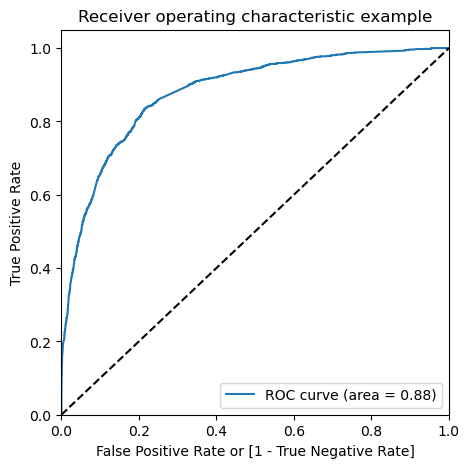

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [100]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011602,5279,0,1,0,0,0,0,0,0,0,0,0
1,0,0.358811,3099,0,1,1,1,1,0,0,0,0,0,0
2,1,0.840714,91,1,1,1,1,1,1,1,1,1,1,0
3,1,0.862028,1577,1,1,1,1,1,1,1,1,1,1,0
4,0,0.103320,487,0,1,1,0,0,0,0,0,0,0,0


In [101]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.604297  0.966622  0.386844
0.2   0.2  0.743191  0.911141  0.642393
0.3   0.3  0.803248  0.834912  0.784245
0.4   0.4  0.804940  0.754623  0.835138
0.5   0.5  0.811876  0.688769  0.885761
0.6   0.6  0.794959  0.574199  0.927450
0.7   0.7  0.778041  0.489400  0.951272
0.8   0.8  0.753680  0.391971  0.970763
0.9   0.9  0.711724  0.251691  0.987818


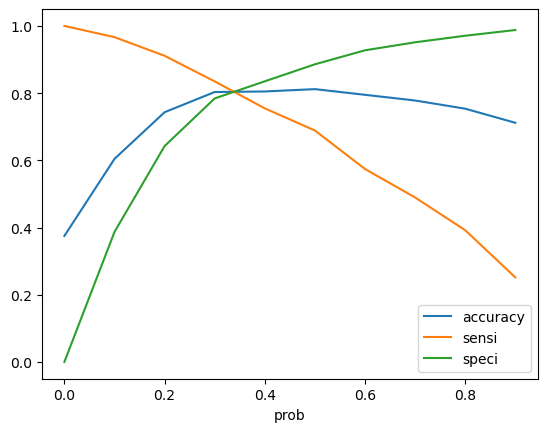

In [102]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011602,5279,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.358811,3099,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.840714,91,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.862028,1577,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.103320,487,0,1,1,0,0,0,0,0,0,0,0,0


In [104]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.011602,5279,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.358811,3099,0,1,1,1,1,0,0,0,0,0,0,1,36
2,1,0.840714,91,1,1,1,1,1,1,1,1,1,1,0,1,84
3,1,0.862028,1577,1,1,1,1,1,1,1,1,1,1,0,1,86
4,0,0.103320,487,0,1,1,0,0,0,0,0,0,0,0,0,10


Model Evaluation

In [105]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.80426323803079


In [106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2967,  727],
       [ 430, 1787]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8060442038791159


In [109]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8031943692474283


In [110]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19680563075257174


In [111]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7108194112967383


In [112]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8734177215189873


Precision and Recall

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3272,  422],
       [ 690, 1527]], dtype=int64)

In [114]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7834787070292457


In [115]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6887686062246279


In [116]:
from sklearn.metrics import precision_score, recall_score

In [117]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7834787070292457


In [118]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6887686062246279


Precision and recall tradeoff

In [119]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 5906    0
 5907    0
 5908    1
 5909    1
 5910    0
 Name: Converted, Length: 5911, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 5906    1
 5907    0
 5908    1
 5909    0
 5910    0
 Name: predicted, Length: 5911, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

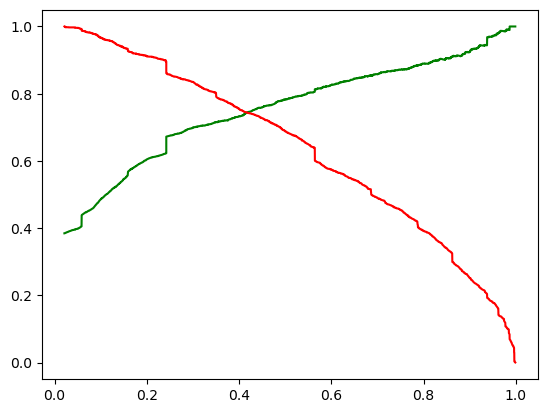

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [122]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [123]:
X_test = X_test[a]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1926,0,-0.865647,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5654,0,-0.865647,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1209,0,-0.482236,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
5234,0,-0.084007,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8497,0,-0.476679,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [124]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1926    0.861865
5654    0.547642
1209    0.486726
5234    0.173993
8497    0.121796
1918    0.096723
7405    0.325982
6561    0.044826
5492    0.824427
7851    0.992652
dtype: float64

In [125]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
y_pred_1.head()

,0
1926,0.861865
5654,0.547642
1209,0.486726
5234,0.173993
8497,0.121796


In [127]:
y_test_df = pd.DataFrame(y_test)

In [128]:
y_test_df['Prospect ID'] = y_test_df.index

In [129]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1926,0.861865
1,0,5654,0.547642
2,0,1209,0.486726
3,0,5234,0.173993
4,0,8497,0.121796


In [132]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [133]:
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [134]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1926,1,0.861865
1,5654,0,0.547642
2,1209,0,0.486726
3,5234,0,0.173993
4,8497,0,0.121796


In [135]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [136]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1926,1,0.861865,1
1,5654,0,0.547642,1
2,1209,0,0.486726,1
3,5234,0,0.173993,0
4,8497,0,0.121796,0


In [137]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.818863456985004


In [138]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1289,  297],
       [ 162,  786]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8291139240506329


In [141]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8127364438839849


Assigning Lead Score to the Testing data

In [142]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1926,1,0.861865,1,86
1,5654,0,0.547642,1,55
2,1209,0,0.486726,1,49
3,5234,0,0.173993,0,17
4,8497,0,0.121796,0,12


In [143]:
topleads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
topleads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1926,1,0.861865,1,86
9,7851,1,0.992652,1,99
15,5882,1,0.984699,1,98
22,4155,1,0.902924,1,90
25,3837,1,0.996179,1,100
...,...,...,...,...,...
2493,7931,1,0.928370,1,93
2497,1780,1,0.996922,1,100
2511,4680,1,0.996179,1,100
2512,8495,1,0.975355,1,98


In [144]:
print("The Prospect ID of the customers which should be contacted are :")

topleads_id = topleads["Prospect ID"].values.reshape(-1)
topleads_id

The Prospect ID of the customers which should be contacted are :


array([1926, 7851, 5882, 4155, 3837, 5822, 4505, 2662, 7707, 3267, 5561,
       7334, 2946, 1397, 6157, 6601,  335, 6178, 8027, 1299, 5826, 1578,
       7641, 4403, 8257, 3321, 3739, 8330, 2673, 4525,  130, 1407, 4233,
        318, 2314, 6778,   66, 4058, 7320, 7222, 2705, 7467, 5490,  447,
       4947, 1585, 7253, 1444,  807, 2259, 1141, 1957, 8075, 4577, 8112,
       4772, 8065, 2683, 4371, 4081, 3190,  745, 6771, 9049, 4671, 6860,
       7042,  137,  607, 2681, 6175, 8596, 6987, 8242, 5276, 4508, 8103,
       3360, 8073, 7458, 4583, 1070, 3090, 4457, 6180, 1647, 7420, 7606,
       5641, 7021, 2878,  785, 4862, 1263,  475, 2870, 9232, 3786, 3477,
       1618, 4955, 2598, 3845, 7496, 1770, 2122, 7417, 3166, 2427, 5167,
       5049, 5579, 3172, 6313, 2661, 4868,  839, 7701, 3286, 8261, 6773,
       7219, 3176, 7501, 3822, 2085, 3461, 7396, 6314, 5633, 8620,  513,
       8648, 3758, 3210, 1171, 3147, 8055, 8415,  954, 4338, 4677, 8282,
        560, 7167, 3570, 3723, 2722, 7432, 1234, 82

In [145]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            2.854084
Lead Origin_Lead Add Form                               2.451586
What is your current occupation_Working Professional    2.450217
Last Activity_Others                                    2.412918
Last Notable Activity_Unreachable                       2.277906
Last Notable Activity_SMS Sent                          1.927107
Last Activity_Unsubscribed                              1.557140
Last Notable Activity_Email Bounced                     1.304547
Total Time Spent on Website                             1.064351
Last Activity_Email Opened                              0.528162
const                                                  -0.226162
Specialization_Others                                  -0.521879
Last Activity_Olark Chat Conversation                  -1.111553
Lead Source_Referral Sites                             -1.174402
Lead Source_Google                                     -1.283811
Lead Source_Organic Searc